**PBL C4_3**

**Energy Demand Forecasting**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading buiding energy consumption dataset

In [3]:
Energy1 = pd.read_excel('/content/drive/MyDrive/For PBL VI/datasets/Building energy consumption racord.xlsx')
# set time column as index
Energy = Energy1.set_index('Time')
Energy

,building 41
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [4]:
# Description of the data
Energy.describe()

,building 41
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


In [5]:
#Load the Weather data from the excel file
weat = pd.read_excel("/content/drive/MyDrive/For PBL VI/datasets/WeatherData.xlsx")
weat = weat.set_index("Time")
weat

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [6]:
#Concatenating the datasets of weather data and electricity consumption
we = pd.concat([weat, Energy], axis=1)
we

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,building 41
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


In [7]:
# check missing data status
we.isna().sum()

month          0
HH             0
TD             0
U              0
Temp           0
RH             0
Q              0
DR             0
FF             0
FX             0
P              0
building 41    0
dtype: int64

<Axes: >

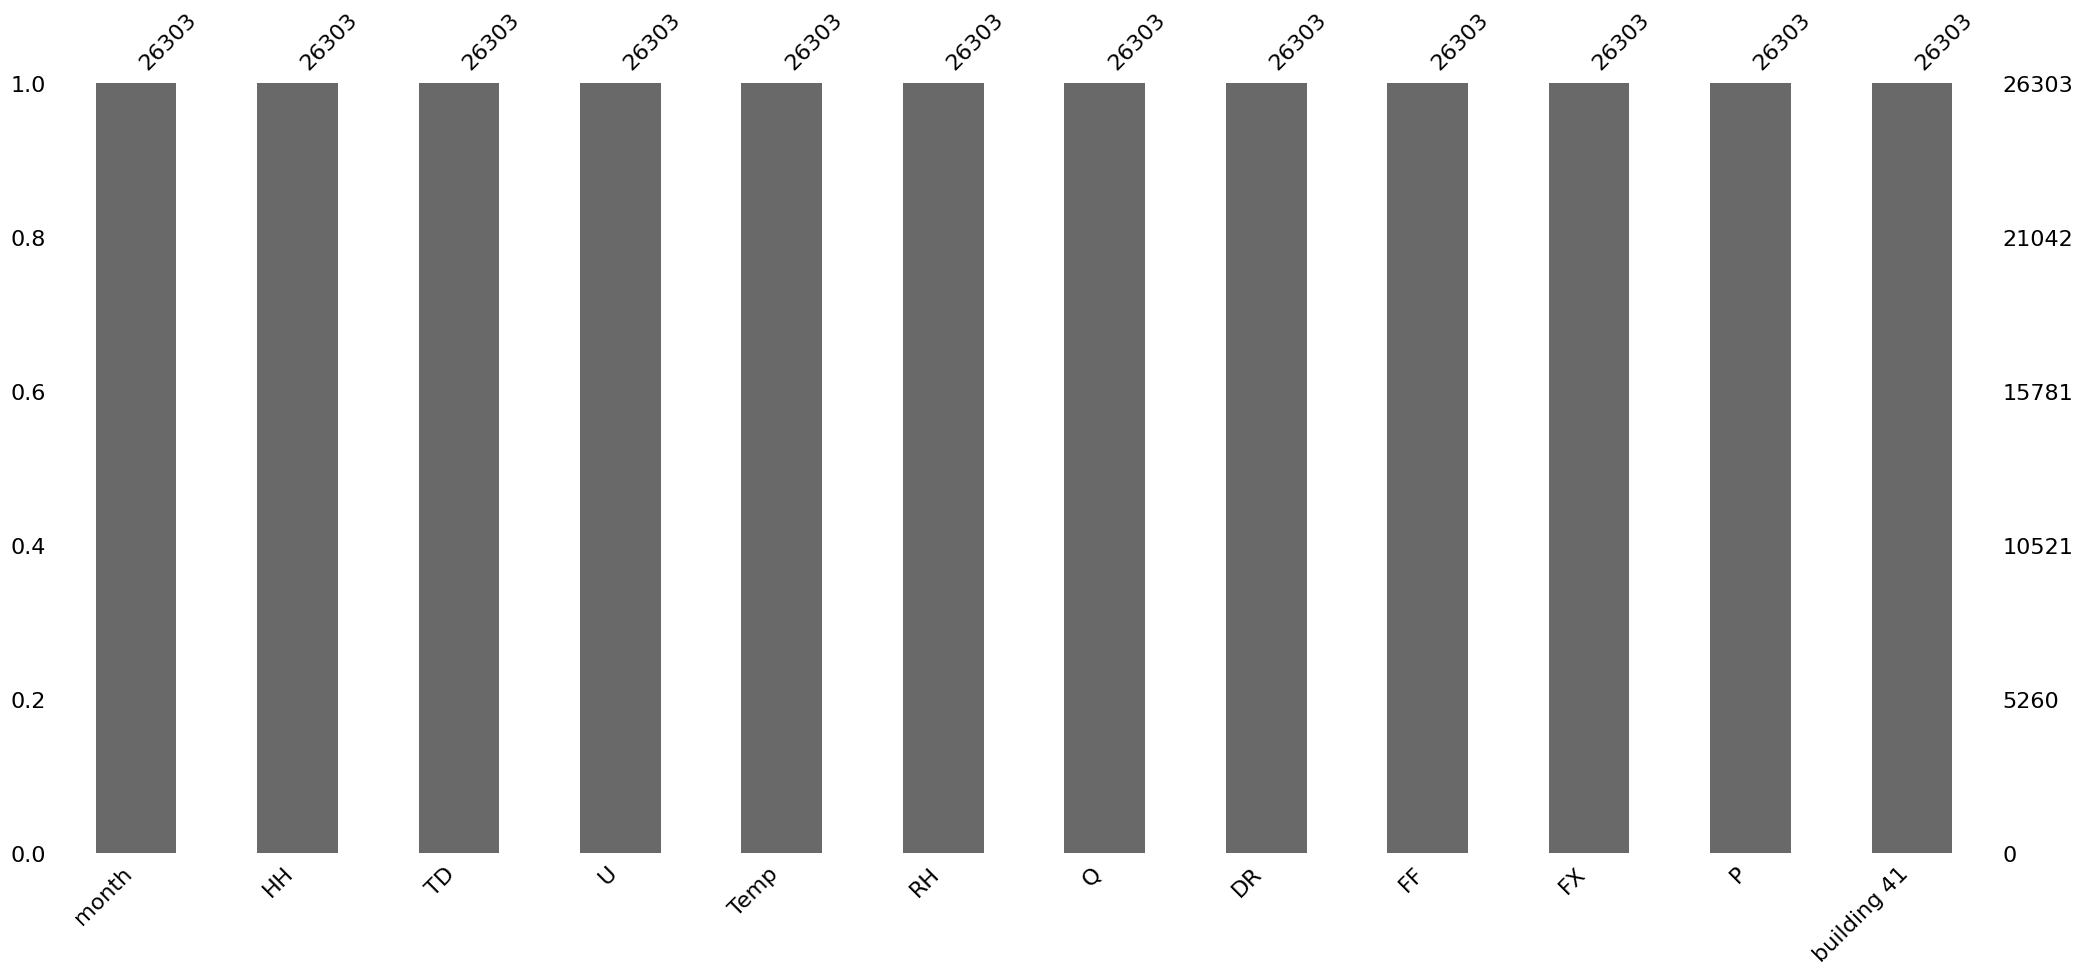

In [8]:
# cross check the availability of the data with missingno library
import missingno as msno
msno.bar(we)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'HH'),
  Text(2.5, 0, 'TD'),
  Text(3.5, 0, 'U'),
  Text(4.5, 0, 'Temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'Q'),
  Text(7.5, 0, 'DR'),
  Text(8.5, 0, 'FF'),
  Text(9.5, 0, 'FX'),
  Text(10.5, 0, 'P'),
  Text(11.5, 0, 'building 41')])

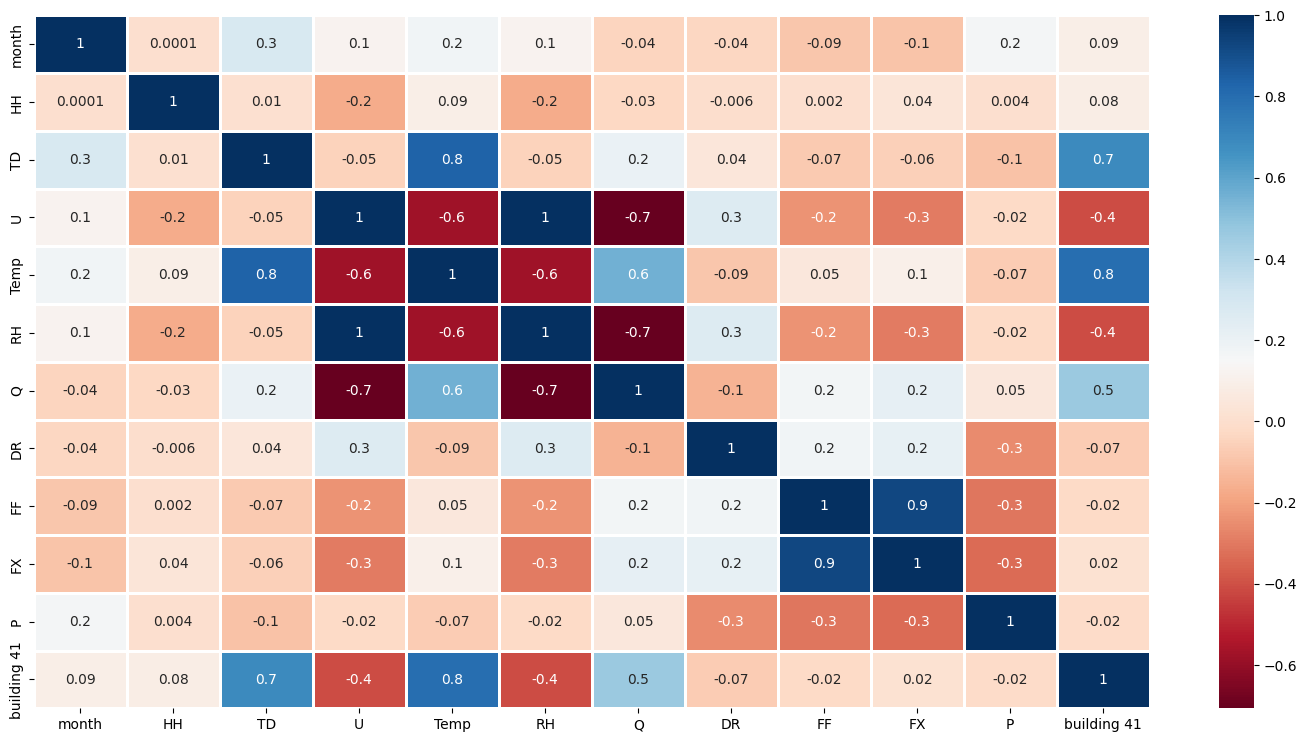

In [9]:
plt.figure(figsize = (18,9)) # Create matplotlib figure
sns.heatmap(we.corr(), annot = True, linewidths=2, fmt=".1g", cmap= 'RdBu')
plt.xticks(rotation='horizontal')

Feature Selection

In [10]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr

#filter columns from dataframe
energy = np.array(we["building 41"]) 
hour = np.array(we["HH"])
month= np.array(we["month"])

# calculate spearman's correlation
corr1, _ = spearmanr(energy, hour)
corr2,_ = spearmanr(energy, month)
print('Spearman Correlation Coefficient between Energy and hour: %.3f' % corr1)
print('Spearman Correlation Coefficient between Energy and month: %.3f' % corr2)

Spearman Correlation Coefficient between Energy and hour: 0.068
Spearman Correlation Coefficient between Energy and month: 0.077


In [11]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model.
weat_updated= weat.loc[:, ~weat.columns.isin(["TD","U","DR","FX"])]
weat_updated

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


Building a machine learning model

Splitting the data

In [12]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weat_updated, Energy, test_size = 0.2, random_state = 0)

In [13]:
X_train

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-11-29 03:00:00,11,3,-4.6,0.91,0,20,10343
2018-01-29 11:00:00,1,11,10.7,0.72,14,80,10259
2018-07-03 20:00:00,7,20,23.5,0.49,11,40,10151
2017-09-05 16:00:00,9,16,23.1,0.70,56,40,10145
2017-03-08 06:00:00,3,6,5.1,0.83,0,40,10169
...,...,...,...,...,...,...,...
2017-06-30 20:00:00,6,20,17.5,0.75,4,20,10057
2018-03-29 17:00:00,3,17,9.9,0.50,60,30,10047
2017-02-14 06:00:00,2,6,0.2,0.76,0,30,10268


In [14]:
X_test

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2017-09-17 04:00:00,9,4,6.0,0.98,0,10,10121
2016-05-27 12:00:00,5,12,19.7,0.70,272,40,10157
2018-04-18 06:00:00,4,6,10.1,0.87,29,10,10306
2018-10-29 02:00:00,10,2,3.4,0.78,0,70,10113
2017-05-30 03:00:00,5,3,18.0,0.88,0,20,10127
...,...,...,...,...,...,...,...
2018-06-30 22:00:00,6,22,21.7,0.35,0,60,10146
2018-09-05 10:00:00,9,10,20.4,0.84,57,30,10178
2016-09-25 02:00:00,9,2,13.7,0.70,0,30,10173


In [15]:
y_train

,building 41
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [16]:
y_test

,building 41
Time,
2017-09-17 04:00:00,19.544633
2016-05-27 12:00:00,32.260418
2018-04-18 06:00:00,20.015587
2018-10-29 02:00:00,20.015587
2017-05-30 03:00:00,39.324742
...,...
2018-06-30 22:00:00,24.489660
2018-09-05 10:00:00,38.853787
2016-09-25 02:00:00,20.722020


In [17]:
#changing a multi-dimensional array to a continuous array
y_train = y_train.values.ravel()
y_train

array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [18]:
y_test = y_test.values.ravel()
y_test

array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

SVM Model

In [19]:
# importing regression model 
from sklearn.svm import SVR

#Creating an instance or object of the support vector machine regressor class
SVReg = SVR(kernel= 'rbf') #Radial Basis Function

# fitting the regression model to the training dataset
SVReg.fit(X_train, y_train)

SVR()

In [20]:
# predicting on the training data
Predicted_Train= SVReg.predict(X_train)
Predicted_Train

array([23.33747534, 23.52037698, 23.57941113, ..., 23.3715236 ,
       23.38476265, 23.42220531])

In [21]:
# To evaluate the performance of the model, importing error metrics function
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R2 Score = ",r2_score(y_train,Predicted_Train))
print("MSE = ",mean_squared_error(y_train,Predicted_Train))

R2 Score =  0.01964854734223298
MSE =  39.16973198670731


Scaling of Features

In [22]:
# Import the required packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler

#Generate the scaler
sSc = StandardScaler()
mSc = MinMaxScaler()
rSc = RobustScaler()

In [23]:
#Scaling the input data
X1 = sSc.fit_transform(weat_updated)
X2 = mSc.fit_transform(weat_updated)
X3 = rSc.fit_transform(weat_updated)

<ipython-input-24-137a8d063a5a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X1,color="red",label="Standard Scaler")


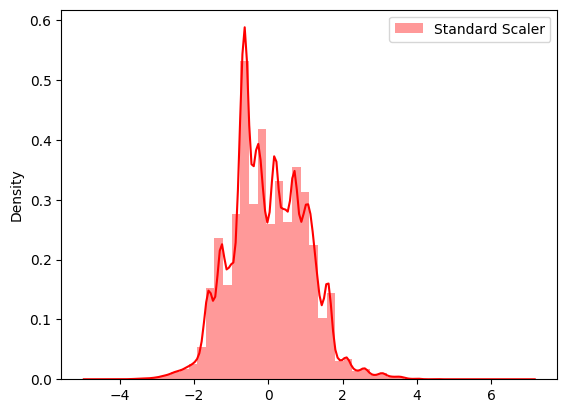

In [24]:
#plotting to visually explore the scaled features
sns.distplot(X1,color="red",label="Standard Scaler")
plt.legend()

<ipython-input-25-8534431da092>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X2,color="blue",label="MinMax Scaler")


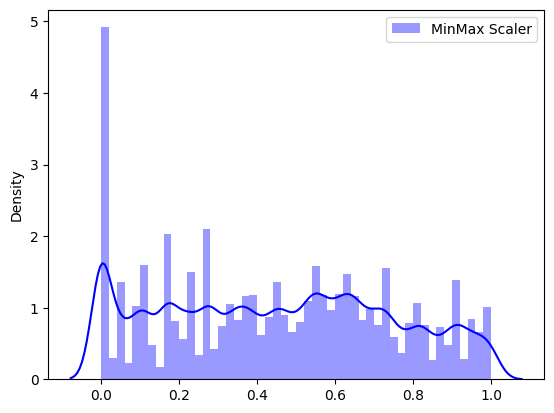

In [25]:
sns.distplot(X2,color="blue",label="MinMax Scaler")
plt.legend()

<ipython-input-26-39f2994ce9e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X3,color="green",label="Robust Scaler")


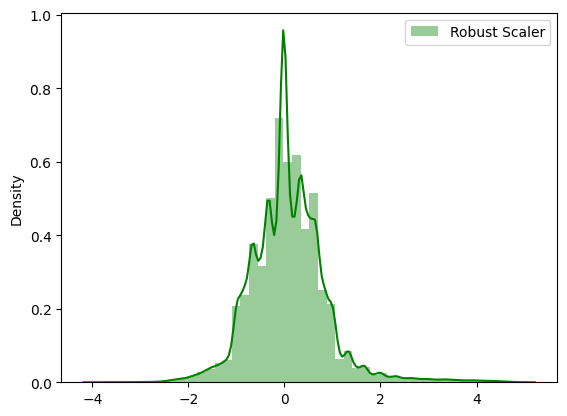

In [26]:
sns.distplot(X3,color="green",label="Robust Scaler")
plt.legend()

Testing for standard scaling

In [27]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr = regr.fit(X_train, y_train)
regr

# fitting the regression model to the training data
regr.fit(X_train, y_train)

# predicting on the training data
predict_train= regr.predict(X_train)

In [28]:
#testing the model training accuracy 
print("Results for Standard Scaling: ")
print("For Training Data: ")
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

#Predicting on the test data
pred= regr.predict(X_test)

##testing the models accuracy on the test data
print("\nFor Testing Data: ")
print("R2 Score = ", r2_score(y_test, pred))
print("MSE = ", mean_squared_error(y_test, pred))

Results for Standard Scaling: 
For Training Data: 
R2 Score =  0.8676607662388549
MSE =  5.287585695616701

For Testing Data: 
R2 Score =  0.865011398619708
MSE =  5.364047670294079


Test for MinMax scaling

In [29]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X2, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train)   

SVR()

In [30]:
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy
print("Results for MinMax Scaling: ")
print("For Training Data: ") 
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

#Predicting on the test data
pred= regr.predict(X_test)

##testing the models accuracy on the test data
print("\nFor Testing Data: ")
print("R2 Score = ", r2_score(y_test, pred))
print("MSE = ", mean_squared_error(y_test, pred))

Results for MinMax Scaling: 
For Training Data: 
R2 Score =  0.8543589078950263
MSE =  5.819058592240028

For Testing Data: 
R2 Score =  0.8514063183174978
MSE =  5.904673312407658


Test for Robust Scaling

In [31]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X3, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train)

SVR()

In [32]:
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy
print("Results for Robust Scaling: ")
print("For Training Data: ") 
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

#predicting on test data
pred_test = regr.predict(X_test)

#testing model accuracy on test data
print("\nFor Testing Data: ") 
print("R2 Score = ", r2_score(y_test, pred_test))
print("MSE = ", mean_squared_error(y_test, pred_test))

Results for Robust Scaling: 
For Training Data: 
R2 Score =  0.861376711378752
MSE =  5.538663759501534

For Testing Data: 
R2 Score =  0.8581322813412404
MSE =  5.637403439847455


Testing for kernels

Testing for linear kernel

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

regr = SVR(kernel='linear')
regr= regr.fit(X_train, y_train)

regr.fit(X_train, y_train)

predict_train= regr.predict(X_train)

In [34]:
print("Results for Linear Kernel: ")
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

Results for Linear Kernel: 
R2 Score =  0.6440430907072687
MSE =  14.222181951190796


Testing for polynomial kernel

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

regr = SVR(kernel='poly')
regr= regr.fit(X_train, y_train)

regr.fit(X_train, y_train)

predict_train= regr.predict(X_train)

In [36]:
print("Results for Polynomial Kernel: ")
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

Results for Polynomial Kernel: 
R2 Score =  0.6354473894568301
MSE =  14.5656213507089


Testing for radial basis function kernel

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

regr.fit(X_train, y_train)

predict_train= regr.predict(X_train)

In [38]:
print("Results for RBF Kernel: ")
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

Results for RBF Kernel: 
R2 Score =  0.8676607662388549
MSE =  5.287585695616701


Checking for all the variables in use

In [39]:
X5 = sSc.fit_transform(weat.loc[:,~weat.columns.isin(["U"])])

In [40]:
#Testing again
X_train, X_test, y_train, y_test = train_test_split(X5, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

regr.fit(X_train, y_train)

predict_train= regr.predict(X_train)

In [41]:
print("Results using Standard Scaler and RBF: ")
print("R2 Score = ", r2_score(y_train, predict_train))
print("MSE = ", mean_squared_error(y_train, predict_train))

Results using Standard Scaler and RBF: 
R2 Score =  0.8692363907335192
MSE =  5.224631956934131


In [42]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print("For Testing Data: ")
SVMR2 = r2_score(y_test, pred)
SVMMSE = mean_squared_error(y_test, pred)
print("R2 Score = ", SVMR2)
print("MSE = ", SVMMSE)

For Testing Data: 
R2 Score =  0.8656435535968942
MSE =  5.338927701659932


Plot between original and predicted data

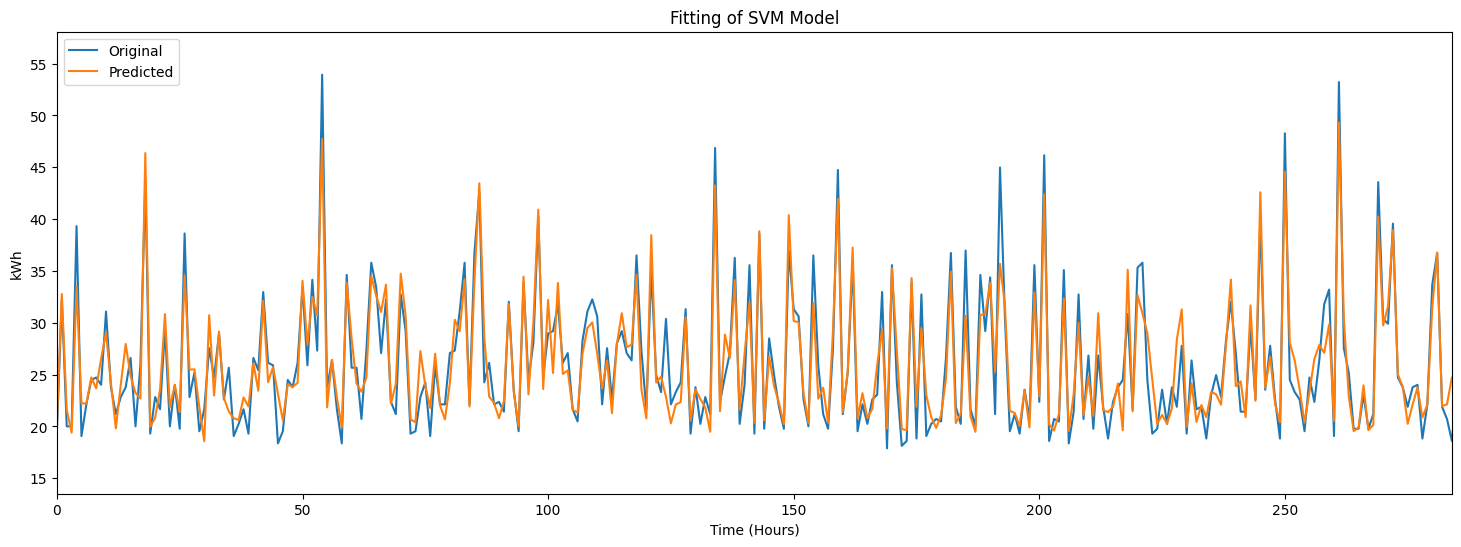

In [43]:
plt.figure(figsize = (18,6))
plt.xlim(0,284)
plt.plot(y_test, label="Original")
plt.plot(pred, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.title("Fitting of SVM Model")
plt.show()

Hyperparamater Tuning

In [44]:
#from sklearn.model_selection import GridSearchCV
#settings for hyperparameters
#check_parameters = {'C':[10,20,30], 'epsilon':[0.03, 0.5, 1], 'gamma':[5,6,7]}

#gridsearchcv = GridSearchCV(regr, check_parameters, n_jobs=-1, cv=3)
#gridsearchcv.fit(X_train, y_train)

#print('Best parameters found:\n', gridsearchcv.best_params_)

In [45]:
Regr = SVR(kernel= 'rbf', C=14, epsilon = 0.032, gamma = 3) 

# fitting the regression model to the training data
Regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= Regr.predict(X_train)

SVMR2 = r2_score(y_train, predict_train)
SVMMSE = mean_squared_error(y_train, predict_train)

#testing the model training accuracy 
print(SVMR2)
print(SVMMSE)

0.9921768284888686
0.31257313950656923


In [46]:
Regr = SVR(kernel= 'rbf', C=14, epsilon = 0.032, gamma = 3) 

# fitting the regression model to the test data
Regr.fit(X_test, y_test) #Fit the SVM model according to the given test data.
# predicting on the test data
predict_test= Regr.predict(X_test)

#testing the model test accuracy
SVMR2Test = r2_score(y_test, predict_test)
SVMMSETest = mean_squared_error(y_test, predict_test) 
print(SVMR2Test)
print(SVMMSETest)

0.9861953911819542
0.5485543150502656


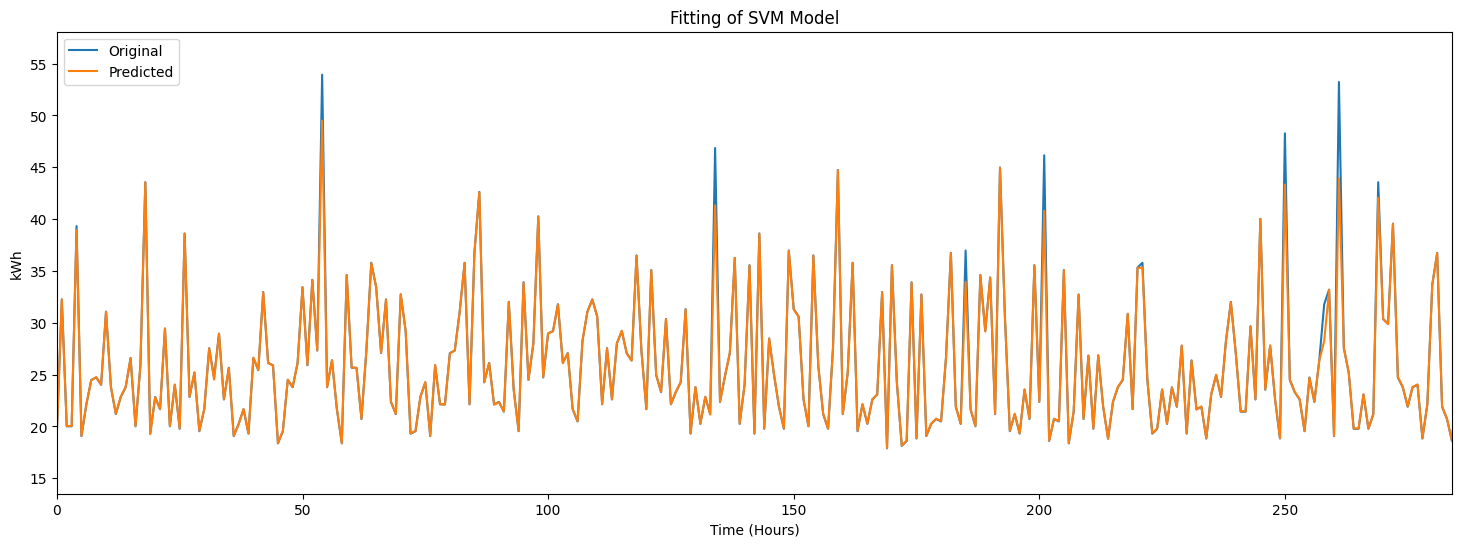

In [47]:
plt.figure(figsize = (18,6))
plt.xlim(0,284)
plt.plot(y_test, label="Original")
plt.plot(predict_test, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.title("Fitting of SVM Model")
plt.show()

Random Forest Regressor Performance

In [48]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X5, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)
RFR2 = r2_score(y_train2, Predicted_Train2)
RFMSE = mean_squared_error(y_train2, Predicted_Train2)

print("Results for Random Forest Regressor: ")
print("\nFor train dataset: ")
print("R2 Score =", RFR2)
print("MSE = ", RFMSE)

Results for Random Forest Regressor: 

For train dataset: 
R2 Score = 0.916772327031522
MSE =  3.325343819519643


In [49]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X5, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

print("Results for Random Forest Regressor: ")
print("\nFor train dataset: ")
print("R2 Score =", r2_score(y_train2, Predicted_Train2))
print("MSE = ", mean_squared_error(y_train2, Predicted_Train2))

Results for Random Forest Regressor: 

For train dataset: 
R2 Score = 0.916772327031522
MSE =  3.325343819519643


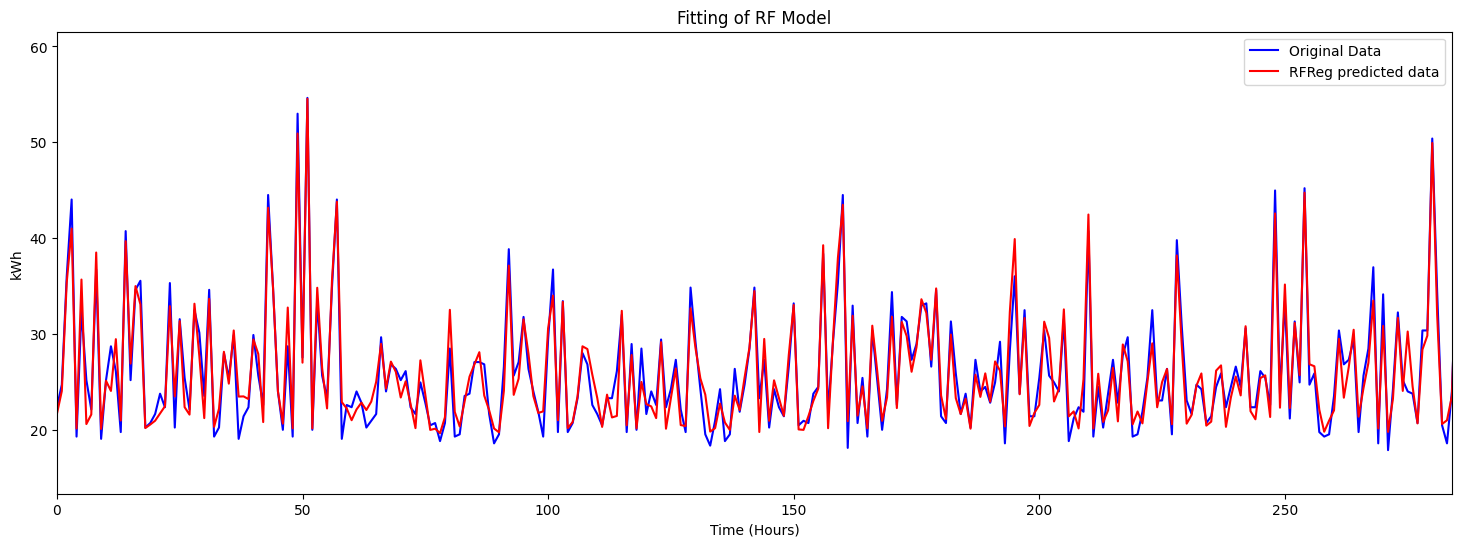

In [50]:
#Visualising our fit to the training data.
plt.figure(figsize = (18,6))
plt.xlim(0,284)
plt.plot(y_train2, color="b",label= 'Original Data')
plt.plot(Predicted_Train2, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.title("Fitting of RF Model")
plt.show()

In [51]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

print("Results for Random Forest Regressor: ")
print("\nFor test dataset: ")
print("R2 Score =", r2_score(y_train2, Predicted_Train2))
print("MSE = ", mean_squared_error(y_train2, Predicted_Train2))

Results for Random Forest Regressor: 

For test dataset: 
R2 Score = 0.916772327031522
MSE =  3.325343819519643


Text(0.5, 1.0, 'Fitting of RF Model')

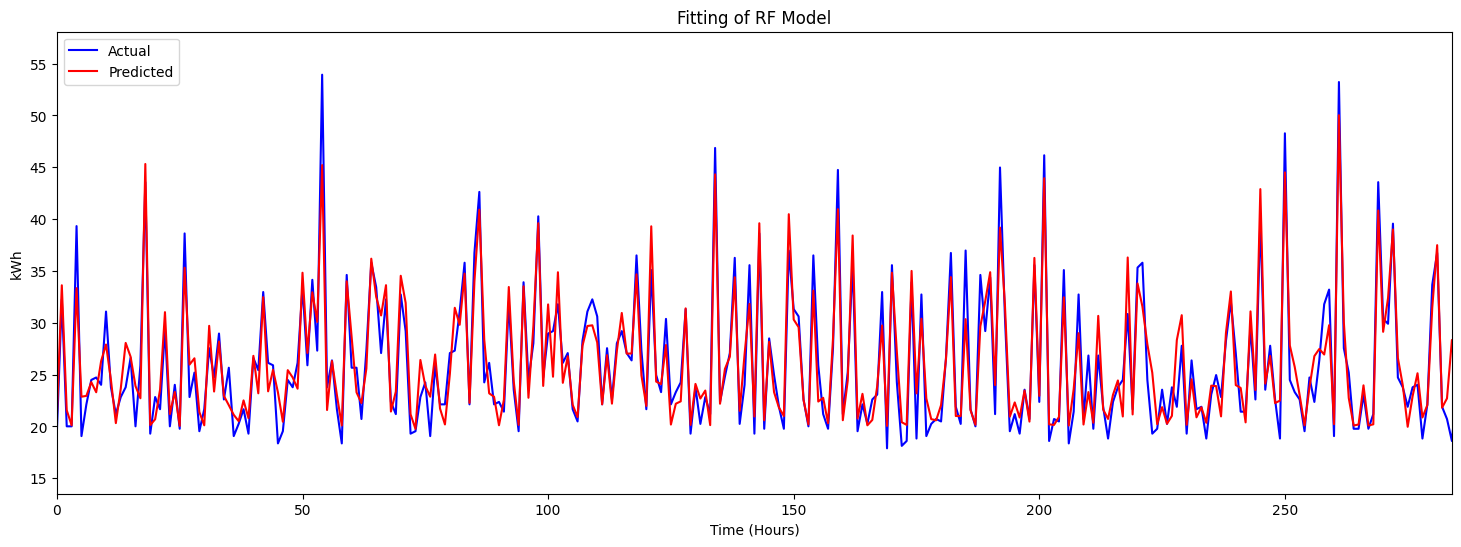

In [52]:
# Lets visualise our fit to the test data.
plt.figure(figsize = (18,6))
plt.xlim(0,284)
plt.plot(y_test2, color='blue', label="Actual")
plt.plot(Predicted_Test2, color='Red', label="Predicted")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.title("Fitting of RF Model")

In [53]:
from sklearn.model_selection import GridSearchCV

Hyperparameter Tuning for RF Model

In [54]:
#settings for hyperparameters
#check_parameters = {'max_depth':[8,9,11,12]}

#gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=3)
#gridsearchcv.fit(X_train, y_train)

#print('Best parameters found:\n', gridsearchcv.best_params_)

In [55]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=12, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X5, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9413680428300156
2.3426272710447176


In [56]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Calculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.8914761615776285
4.312416283363921


In [57]:
#settings for hyperparameters
#check_parameters = {'max_depth':[15,20,30]}

#gridsearchcv = GridSearchCV(RFReg, check_parameters, n_jobs=-1, cv=10)
#gridsearchcv.fit(X_train, y_train)

#print('Best parameters found:\n', gridsearchcv.best_params_)

In [58]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=27, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X5, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

RFR2 = r2_score(y_train2, Predicted_Train2)
RFMSE = mean_squared_error(y_train2, Predicted_Train2)

#Caculating R2 score and Root mean square error
print(RFR2)
print(RFMSE)

0.9871025619999891
0.51531436854203


In [59]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
RFR2Test = r2_score(y_test2,Predicted_Test2)
RFMSETest = mean_squared_error(y_test2,Predicted_Test2)
print(RFR2Test)
print(RFMSETest)

0.9064192603728158
3.7186217447162955


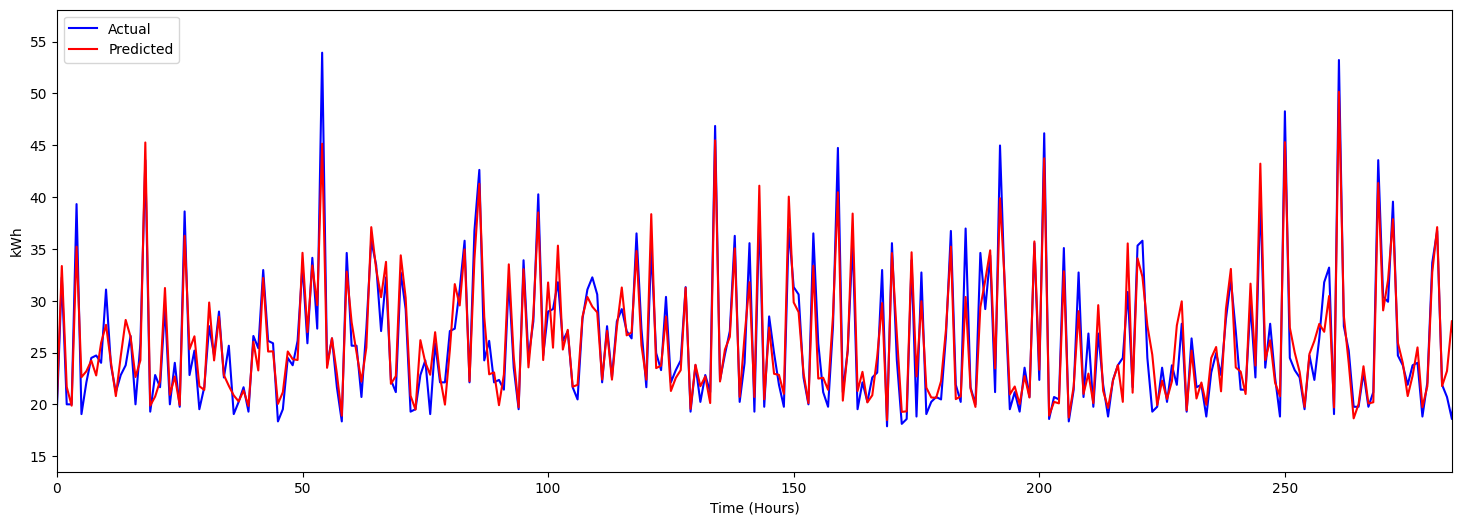

In [60]:
# Lets visualise our fit to the test data.
plt.figure(figsize = (18,6))
plt.xlim(0,284)
plt.plot(y_test2, color='blue', label="Actual")
plt.plot(Predicted_Test2, color='Red', label="Predicted")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')

Comparison of SVM and RF Models

In [61]:
print("SVM R2 - Score = ",SVMR2Test)
print("SVM MSE = ",SVMMSETest)
print("RF R2 - Score = ",RFR2Test)
print("RF MSE = ",RFMSETest)

SVM R2 - Score =  0.9861953911819542
SVM MSE =  0.5485543150502656
RF R2 - Score =  0.9064192603728158
RF MSE =  3.7186217447162955


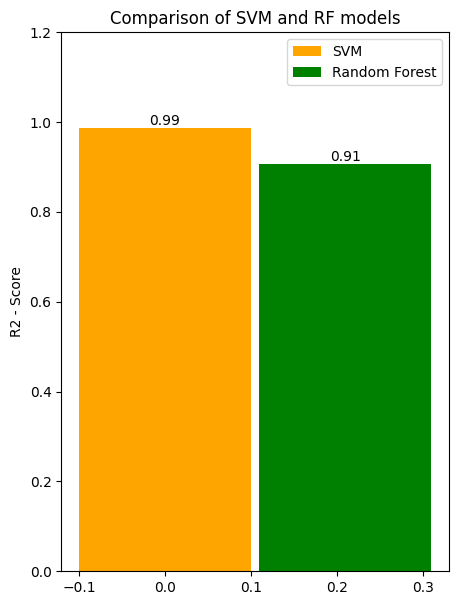

In [62]:
plt.figure(figsize = (5,7))
width = 0.20
x = np.arange(1)

bars1 = plt.bar(x, SVMR2Test, width, color='orange', label='SVM')
bars2 = plt.bar(x+0.21, RFR2Test, width, color='green', label='Random Forest')

plt.ylim(0,1.2)
plt.ylabel("R2 - Score")
plt.legend(loc='best')

# Add values to bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), round(bar1.get_height(), 2),
             ha='center', va='bottom', color='black')
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), round(bar2.get_height(), 2),
             ha='center', va='bottom', color='black')
plt.title('Comparison of SVM and RF models')
plt.show()

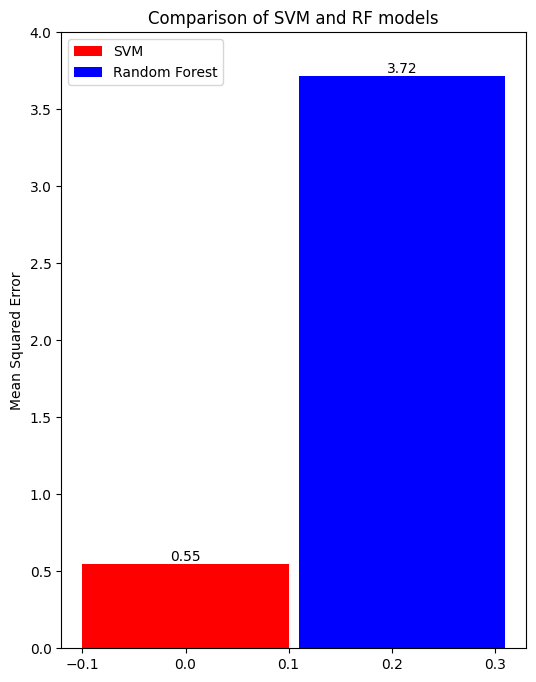

In [63]:
plt.figure(figsize = (6,8))
width = 0.20
x = np.arange(1)

bars1 = plt.bar(x, SVMMSETest, width, color='red', label='SVM')
bars2 = plt.bar(x+0.21, RFMSETest, width, color='blue', label='Random Forest')

plt.ylim(0,4)
plt.ylabel("Mean Squared Error")
plt.legend(loc='best')

# Add values to bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), round(bar1.get_height(), 2),
             ha='center', va='bottom', color='black')
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), round(bar2.get_height(), 2),
             ha='center', va='bottom', color='black')
plt.title('Comparison of SVM and RF models')
plt.show()

Predictive modeling

In [64]:
# Import the weather cost file
path= "/content/drive/MyDrive/For PBL VI/YTVidGit/Weather_Cost.xlsx"
weather_cost = pd.read_excel(path)
weather_cost = weather_cost.set_index('Time')
weather_cost

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2019-01-01 00:00:00,1,1,68,96,73,1,0,6,40,90,10323
2019-01-01 01:00:00,1,2,65,94,74,-1,0,0,40,70,10320
2019-01-01 02:00:00,1,3,63,93,73,0,0,0,40,70,10314
2019-01-01 03:00:00,1,4,61,92,73,0,0,0,50,60,10308
2019-01-01 04:00:00,1,5,58,92,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,1,20,-24,93,-15,0,0,0,30,60,9929
2019-01-31 20:00:00,1,21,-22,95,-15,0,0,0,30,60,9920
2019-01-31 21:00:00,1,22,-24,91,-11,0,0,0,40,70,9911


In [65]:
weather_cost.isna().sum()

month    0
HH       0
TD       0
U        0
Temp     0
RH       0
Q        0
DR       0
FF       0
FX       0
P        0
dtype: int64

In [66]:
#remove relative humidity column from the data set
weather_cost_updated= weather_cost.loc[:, ~weather_cost.columns.isin(['U'])]
weather_cost_updated

,month,HH,TD,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,
2019-01-01 00:00:00,1,1,68,73,1,0,6,40,90,10323
2019-01-01 01:00:00,1,2,65,74,-1,0,0,40,70,10320
2019-01-01 02:00:00,1,3,63,73,0,0,0,40,70,10314
2019-01-01 03:00:00,1,4,61,73,0,0,0,50,60,10308
2019-01-01 04:00:00,1,5,58,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...
2019-01-31 19:00:00,1,20,-24,-15,0,0,0,30,60,9929
2019-01-31 20:00:00,1,21,-22,-15,0,0,0,30,60,9920
2019-01-31 21:00:00,1,22,-24,-11,0,0,0,40,70,9911


In [67]:
#scale the input data
X5 = sSc.transform(weather_cost_updated)

In [68]:
#predict the consumption
predicted = RFReg.predict(X5)
predicted.shape

(744,)

In [69]:
#Converting the predicted array into a dataframe so it is easier when plotting to show the time index
predicted= pd.DataFrame(predicted, columns=['kWh'])
predicted['Time']= weather_cost.index
predicted= predicted.set_index('Time')
predicted

,kWh
Time,
2019-01-01 00:00:00,45.124553
2019-01-01 01:00:00,45.108070
2019-01-01 02:00:00,45.174004
2019-01-01 03:00:00,45.277614
2019-01-01 04:00:00,45.185777
...,...
2019-01-31 19:00:00,22.664709
2019-01-31 20:00:00,22.636452
2019-01-31 21:00:00,22.612904


In [70]:
predicted.head(9)

,kWh
Time,
2019-01-01 00:00:00,45.124553
2019-01-01 01:00:00,45.108070
2019-01-01 02:00:00,45.174004
2019-01-01 03:00:00,45.277614
2019-01-01 04:00:00,45.185777
2019-01-01 05:00:00,45.117489
2019-01-01 06:00:00,45.176358
2019-01-01 07:00:00,45.185777
2019-01-01 08:00:00,45.329419


In [71]:
predicted.iloc[396:405]

,kWh
Time,
2019-01-17 12:00:00,45.593154
2019-01-17 13:00:00,45.383579
2019-01-17 14:00:00,44.545279
2019-01-17 15:00:00,21.993599
2019-01-17 16:00:00,22.617614
2019-01-17 17:00:00,22.982604
2019-01-17 18:00:00,22.810705
2019-01-17 19:00:00,22.189045
2019-01-17 20:00:00,22.711805


In [72]:
predicted.tail(9)

,kWh
Time,
2019-01-31 15:00:00,21.692187
2019-01-31 16:00:00,23.802066
2019-01-31 17:00:00,23.528912
2019-01-31 18:00:00,22.864865
2019-01-31 19:00:00,22.664709
2019-01-31 20:00:00,22.636452
2019-01-31 21:00:00,22.612904
2019-01-31 22:00:00,22.565809
2019-01-31 23:00:00,22.311493


Forecasted hourly consumption in kWh

Text(0.5, 0, 'Date')

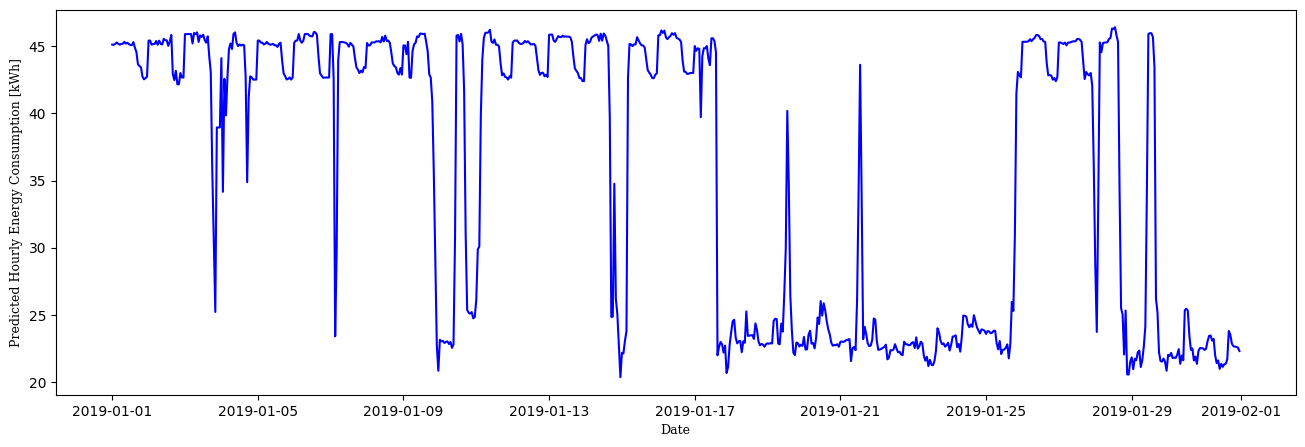

In [73]:
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='serif')

fig, ax = plt.subplots(figsize = (16,5))
ax.plot(predicted,  label='Predicted Hourly Energy Consumption',color = 'blue')
ax.set_ylabel('Predicted Hourly Energy Consumption [kWh]',fontdict={'family': 'serif', 'size': 9, 'color': 'black'})
ax.set_xlabel('Date',fontdict={'family': 'serif', 'size': 9, 'color': 'black'})

In [74]:
H_Cost= predicted*4
H_Cost.rename(columns={'kWh': 'Cost (₹)'}, inplace=True)
H_Cost

,Cost (₹)
Time,
2019-01-01 00:00:00,180.498213
2019-01-01 01:00:00,180.432280
2019-01-01 02:00:00,180.696014
2019-01-01 03:00:00,181.110455
2019-01-01 04:00:00,180.743110
...,...
2019-01-31 19:00:00,90.658838
2019-01-31 20:00:00,90.545808
2019-01-31 21:00:00,90.451617


Calculating the hourly consumption cost

In [75]:
H_Cost.head(9)

,Cost (₹)
Time,
2019-01-01 00:00:00,180.498213
2019-01-01 01:00:00,180.432280
2019-01-01 02:00:00,180.696014
2019-01-01 03:00:00,181.110455
2019-01-01 04:00:00,180.743110
2019-01-01 05:00:00,180.469956
2019-01-01 06:00:00,180.705434
2019-01-01 07:00:00,180.743110
2019-01-01 08:00:00,181.317675


In [76]:
H_Cost.iloc[396:405]

,Cost (₹)
Time,
2019-01-17 12:00:00,182.372614
2019-01-17 13:00:00,181.534314
2019-01-17 14:00:00,178.181115
2019-01-17 15:00:00,87.974394
2019-01-17 16:00:00,90.470455
2019-01-17 17:00:00,91.930416
2019-01-17 18:00:00,91.242822
2019-01-17 19:00:00,88.756179
2019-01-17 20:00:00,90.847220


In [77]:
H_Cost.tail(9)

,Cost (₹)
Time,
2019-01-31 15:00:00,86.768749
2019-01-31 16:00:00,95.208263
2019-01-31 17:00:00,94.115647
2019-01-31 18:00:00,91.459461
2019-01-31 19:00:00,90.658838
2019-01-31 20:00:00,90.545808
2019-01-31 21:00:00,90.451617
2019-01-31 22:00:00,90.263235
2019-01-31 23:00:00,89.245973


In [78]:
#Resampling the hourly consumption charges into daily by using the resample function and sum
Daily_Cost = H_Cost.resample("D").sum()
print("total cost", Daily_Cost.sum())

total cost Cost (₹)    106152.113807
dtype: float64


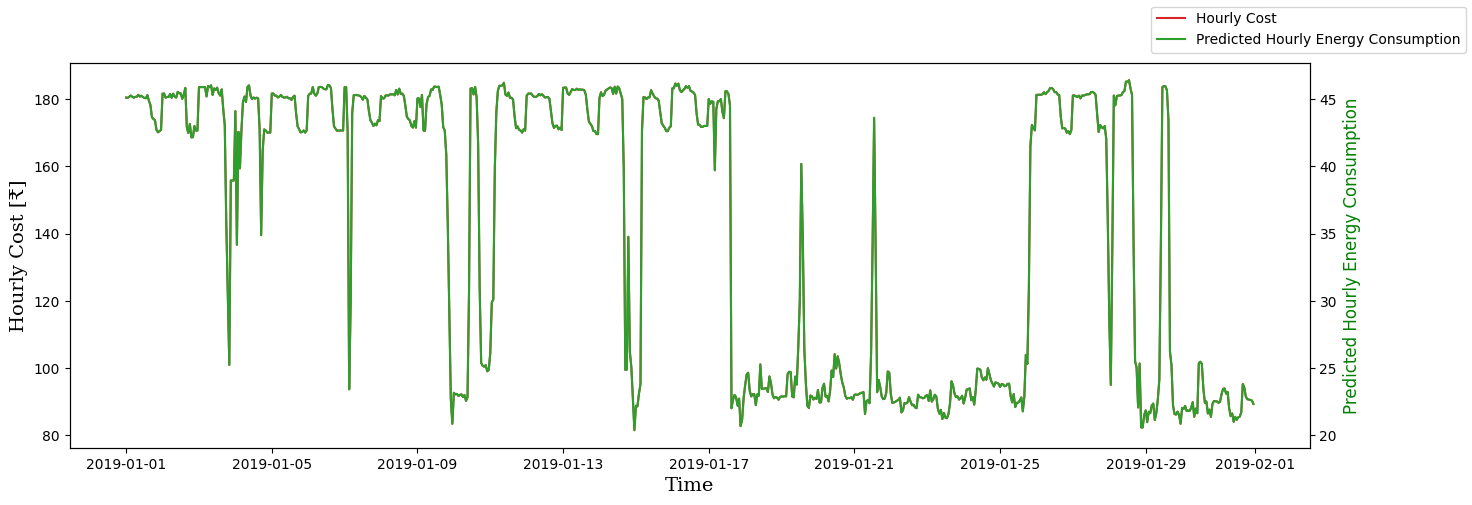

In [79]:
fig, ax = plt.subplots(figsize = (16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(H_Cost,  label='Hourly Cost',color = 'tab:red')
ax2.plot(predicted,  label='Predicted Hourly Energy Consumption',color = 'tab:green')
ax.set_ylabel('Hourly Cost [₹]', fontdict={'family': 'serif', 'size': 14, 'color': 'black'})
ax2.set_ylabel('Predicted Hourly Energy Consumption',size=12, color='green')
ax.set_xlabel('Time',fontdict={'family': 'serif', 'size': 14, 'color': 'black'})
fig.legend()

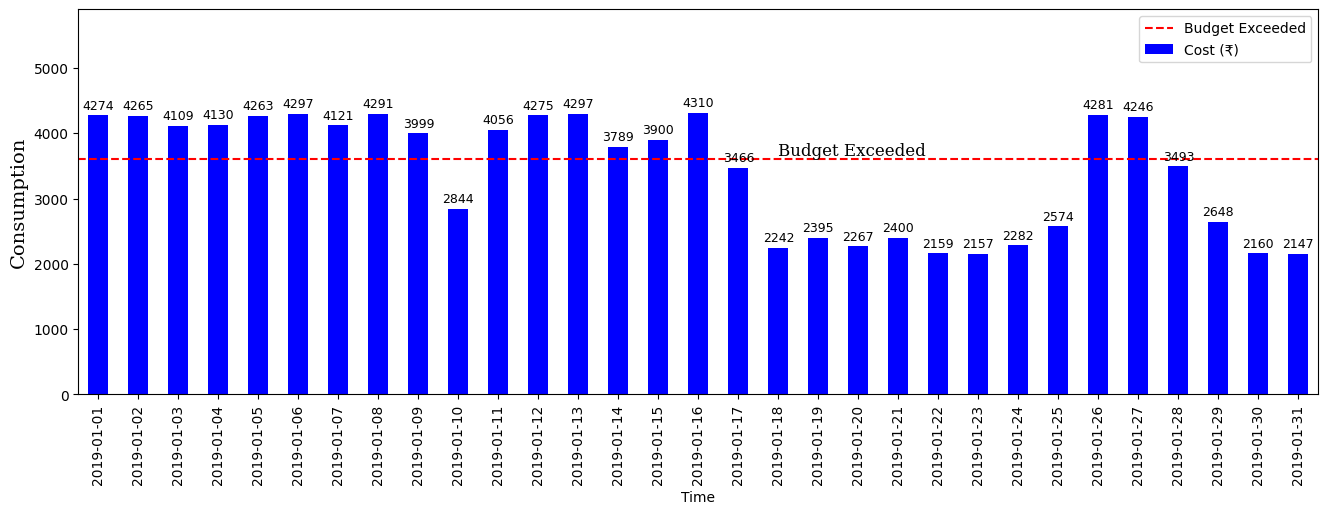

In [80]:
fig = plt.figure(figsize = (16,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
plt.ylim(0,5900)
Daily_Cost.plot(kind='bar', ax=ax, rot=0,color='blue')
ax.axhline(y=3600, color='red', linestyle='--', label="Budget Exceeded")
plt.text(17, 3659, 'Budget Exceeded', fontdict={'family': 'serif', 'size': 12, 'color': 'black'})

# Get the values for each column
values = Daily_Cost.values

# Add text labels for each value
for i in range(len(Daily_Cost.index)):
    for j in range(len(Daily_Cost.columns)):
        ax.text(i, int(values[i][j])+100, str(int(values[i][j])), ha='center', fontsize=9)

ax.set_ylabel('Consumption', fontdict={'family': 'serif', 'size': 14, 'color': 'black'})
plt.xticks(rotation='vertical')
ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in Daily_Cost.index])
plt.legend(loc='best')